In [56]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt 

In [57]:
batting=pd.read_csv("/home/gajendra/Documents/Data_Analytics_IPL/web_scraping/batting/stats_batting_2.csv")
bowling=pd.read_csv("/home/gajendra/Documents/Data_Analytics_IPL/web_scraping/bowling/stats_bowling_1.csv")

batting.head()
# bowling.head()

,player_name,runs_scored,balls_faced,times_out,batting_avg,strike_rate
0,A Ashish Reddy,280,193,15,18.67,145.08
1,A Chopra,53,71,6,8.83,74.65
2,A Choudhary,25,20,1,25.00,125.00
3,A Flintoff,62,53,2,31.00,116.98
4,A Kumble,35,47,3,11.67,74.47


In [58]:
batting.dropna(inplace=True)
bowling.dropna(inplace=True)

In [59]:
#we thought of taking only batting avg and strike rate for clustering but
#the guy who faced 1 ball and hit 1 run also belongs to top batsmans cluster so we are considering all
FEATURES_COL=["runs_scored","balls_faced","times_out","batting_avg","strike_rate"]
FEATURES_COL_BOWL=["runs_conceded","wickets_taken","overs_bowled","bowling_average","economy_rate","bowling_strike_rate"]

In [60]:
batting[FEATURES_COL] = batting[FEATURES_COL].astype(float)
bowling[FEATURES_COL_BOWL]=bowling[FEATURES_COL_BOWL].astype(float)

In [61]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(batting[FEATURES_COL])
batting["cluster"] = kmeans.labels_

kmeans = KMeans(n_clusters=7)
kmeans.fit(bowling[FEATURES_COL_BOWL])
bowling["cluster"] = kmeans.labels_

In [70]:
batting[batting['cluster']==4]

,player_name,runs_scored,balls_faced,times_out,batting_avg,strike_rate,cluster
135,G Gambhir,4217.0,3404.0,136.0,31.01,123.88,4
325,RG Sharma,4493.0,3429.0,141.0,31.87,131.03,4
377,SK Raina,4985.0,3601.0,145.0,34.38,138.43,4
435,V Kohli,4948.0,3784.0,129.0,38.36,130.76,4


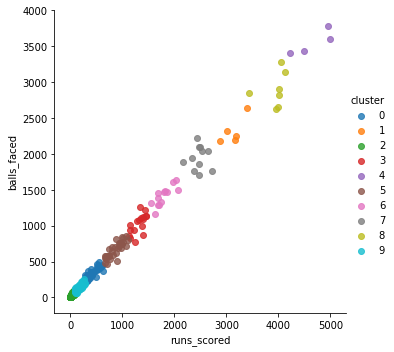

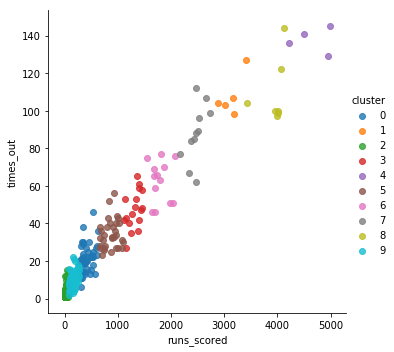

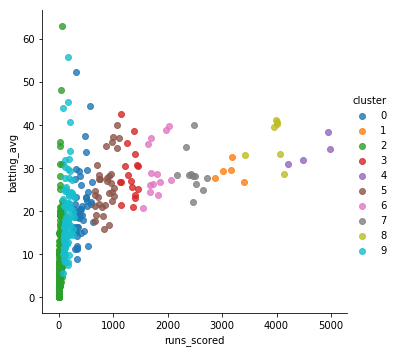

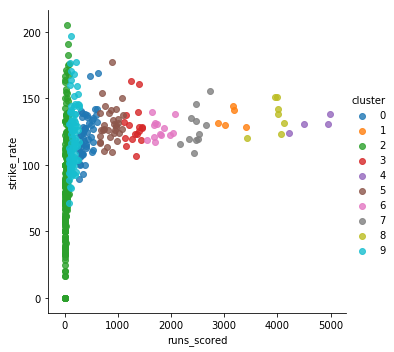

In [77]:
facet = sns.lmplot(data=batting, x='runs_scored', y='balls_faced', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=batting, x='runs_scored', y='times_out', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=batting, x='runs_scored', y='batting_avg', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=batting, x='runs_scored', y='strike_rate', hue='cluster', fit_reg=False, legend=True, legend_out=True)

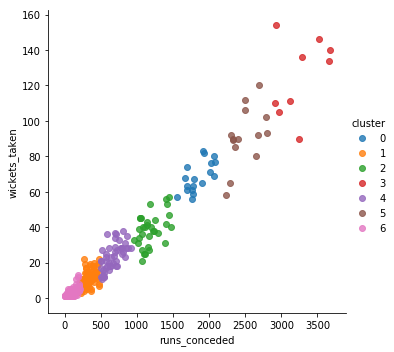

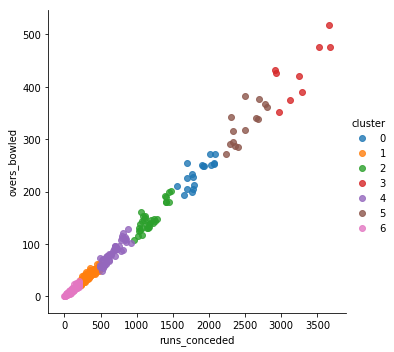

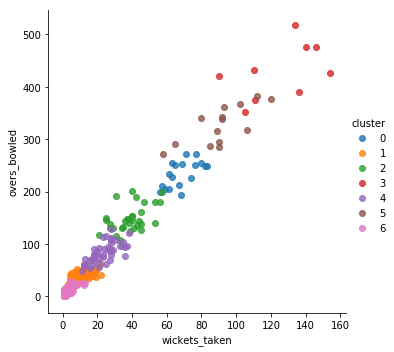

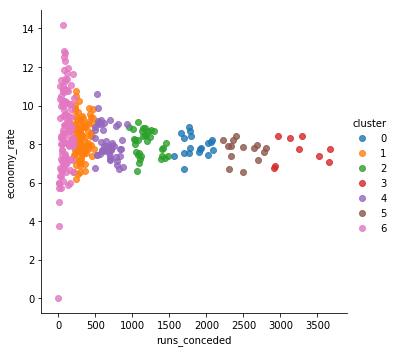

In [76]:
facet = sns.lmplot(data=bowling, x="runs_conceded", y='wickets_taken', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=bowling, x='runs_conceded', y='overs_bowled', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=bowling, x='wickets_taken', y='overs_bowled', hue='cluster', fit_reg=False, legend=True, legend_out=True)
facet = sns.lmplot(data=bowling, x='runs_conceded', y='economy_rate', hue='cluster', fit_reg=False, legend=True, legend_out=True)

In [41]:
batting_cluster=batting[['player_name','cluster']]
bowling_cluster=bowling[['player_name','cluster']]

In [53]:
batting_cluster.to_csv("/home/gajendra/Documents/Data_Analytics_IPL/Clustering/batting_cluster.csv")
bowling_cluster.to_csv("/home/gajendra/Documents/Data_Analytics_IPL/Clustering/bowling_cluster.csv")

In [44]:
batting[batting['cluster']==4]

,player_name,runs_scored,balls_faced,times_out,batting_avg,strike_rate,cluster
10,A Symonds,974.0,750.0,27.0,36.07,129.87,4
21,AB de Villiers,3953.0,2619.0,100.0,39.53,150.94,4
23,AC Gilchrist,2069.0,1495.0,76.0,27.22,138.39,4
25,AC Voges,181.0,143.0,4.0,45.25,126.57,4
39,AN Ahmed,36.0,26.0,1.0,36.00,138.46,4
72,BJ Rohrer,193.0,140.0,6.0,32.17,137.86,4
82,CA Lynn,875.0,620.0,25.0,35.00,141.13,4
84,CH Gayle,3994.0,2650.0,97.0,41.18,150.72,4
98,D Wiese,127.0,90.0,4.0,31.75,141.11,4
100,DA Miller,1637.0,1169.0,46.0,35.59,140.03,4
